In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('ARIMA Model Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('WTI Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

In [ ]:
df = pd.read_excel("WTI.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,WTI,WTI_LAG1,WTI_LAG2,WTI_LAG3,WTI_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.028554,0.095448,0.084944,0.016658,-0.077023,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.099040,0.028554,0.095448,0.084944,0.016658,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,-0.080447,0.099040,0.028554,0.095448,0.084944,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.135538,-0.080447,0.099040,0.028554,0.095448,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.006551,-0.135538,-0.080447,0.099040,0.028554,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.198614,0.091224,0.068518,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.121634,-0.153171,0.141561,0.198614,0.091224,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.081122,-0.121634,-0.153171,0.141561,0.198614,0.015792,1.58,1.38,0.005921,1,1


In [ ]:
y = df['WTI']
X = df[["WTI_LAG1","WTI_LAG2","WTI_LAG3","WTI_LAG4","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    WTI   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.041
Date:                Sat, 13 Jan 2024   Prob (F-statistic):            0.00298
Time:                        13:56:42   Log-Likelihood:                 57.567
No. Observations:                 109   AIC:                            -95.13
Df Residuals:                      99   BIC:                            -68.22
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
selected_columns = ["WTI","WTI_LAG1","WTI_LAG3","Infectious Disease Tracker","COV19"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,WTI,WTI_LAG1,WTI_LAG3,Infectious Disease Tracker,COV19
DATE,,,,,
1996-07-01,0.028554,0.095448,0.016658,-0.196710,0
1996-10-01,0.099040,0.028554,0.084944,0.083382,0
1997-01-01,-0.080447,0.099040,0.095448,-0.446287,0
1997-04-01,-0.135538,-0.080447,0.028554,0.782759,0
1997-07-01,-0.006551,-0.135538,0.099040,0.041964,0
...,...,...,...,...,...
2022-07-01,-0.153171,0.141561,0.091224,-0.083527,1
2022-10-01,-0.121634,-0.153171,0.198614,-0.269102,1
2023-01-01,-0.081122,-0.121634,0.141561,0.005921,1


In [ ]:
# Splitting the dataset
train_df = pruned_df.iloc[:-8]
test_df = pruned_df.iloc[-8:]


In [ ]:
# Separate the target variable and the features
X_train = train_df[["WTI_LAG1","WTI_LAG3","Infectious Disease Tracker","COV19"]]
y_train = train_df["WTI"]

X_test = test_df[["WTI_LAG1","WTI_LAG3","Infectious Disease Tracker","COV19"]]
y_test = test_df["WTI"]

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Create the model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1.5, 'subsample': 0.7}


In [ ]:
results = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

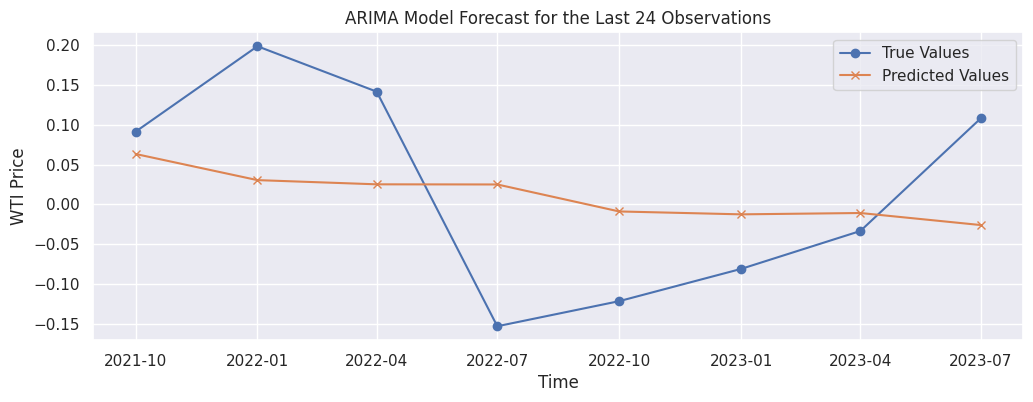

In [ ]:
plotFor(results.y_test, results.predictions)

In [ ]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.1036
MAPE: 85.3149 %
MSE: 0.0138
RMSE: 0.1174


## Save Prediction

In [ ]:
df = pd.DataFrame({'WTI Q XG': predictions, 'Actual': y_test})
df.to_excel("WTI_Q_XG_forecast.xlsx", index=True)
df

,WTI Q XG,Actual
DATE,,
2021-10-01,0.063274,0.091224
2022-01-01,0.030425,0.198614
2022-04-01,0.025137,0.141561
2022-07-01,0.024961,-0.153171
2022-10-01,-0.008945,-0.121634
2023-01-01,-0.012579,-0.081122
2023-04-01,-0.010897,-0.033490
2023-07-01,-0.026056,0.108301


In [ ]:
# Open a file in write mode
with open('WTI Q XG Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')